<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gravity-Field-Calculation-using-esys.escript" data-toc-modified-id="Gravity-Field-Calculation-using-esys.escript-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gravity Field Calculation using <code>esys.escript</code></a></span><ul class="toc-item"><li><span><a href="#Outline" data-toc-modified-id="Outline-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Outline</a></span></li><li><span><a href="#Useful-links:" data-toc-modified-id="Useful-links:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Useful links:</a></span></li><li><span><a href="#An-example-problem:-Gravity-Field-Anomalies" data-toc-modified-id="An-example-problem:-Gravity-Field-Anomalies-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>An example problem: Gravity Field Anomalies</a></span></li><li><span><a href="#The-PDE-template" data-toc-modified-id="The-PDE-template-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The PDE template</a></span></li><li><span><a href="#How-to-create-a-domain" data-toc-modified-id="How-to-create-a-domain-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>How to create a domain</a></span></li><li><span><a href="#Setting-up-and-solving-a-PDE" data-toc-modified-id="Setting-up-and-solving-a-PDE-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Setting up and solving a PDE</a></span></li><li><span><a href="#Gravity-Field" data-toc-modified-id="Gravity-Field-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Gravity Field</a></span></li><li><span><a href="#Value-Picking" data-toc-modified-id="Value-Picking-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Value Picking</a></span><ul class="toc-item"><li><span><a href="#Along-a-line-of-points-(transect)" data-toc-modified-id="Along-a-line-of-points-(transect)-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Along a line of points (transect)</a></span></li></ul></li></ul></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Gravity Field Calculation using `esys.escript`

## Outline

This unit gives an introduction into solving partial differential equations (PDEs) in python. This 
section assumed that you have a basic understanding how to work with python.


We are particularly looking at PDEs as they arise in geophysical problems. Of course it would take some work to build appropriate PDE solvers from scratch. To save this effort we use the python PDE solver module `esys.escript`. This section will give an introduction into the work with `esys.escript` to solve 2D problems. To illustrate the use we will look at the 
calculation of gravity anomaly fields from subsurface density anomalies. The following section will then present some geophysical applications of PDEs. The the third section will discuss the use of `esys.escript` to solve seismic wave equations in time and in frequency domain.

We first present some details the PDEs for modeling gravity field anomalies before we start to
discuss how to use `esys.escript` to solve this PDE. 

## Useful links:

- [esys.escript home page](https://github.com/esys-escript/esys-escript.github.io)
- [Researchgate](https://www.researchgate.net/project/esys-escript)
- [user's guide](https://github.com/esys-escript/esys-escript.github.io/blob/master/user.pdf)
- [API documentation](https://esys-escript.github.io/api.html)


## An example problem: Gravity Field Anomalies
The gravitational field $\mathbf{g}$ (also called gravitational acceleration) is a vector field defining the gravitational force experienced by a particle as its mass multiplied by the gravitational field at that point.
In Cartesian coordinates the gravitational field $\mathbf{g}$ is expressed in the form
\begin{equation} 
\mathbf{g}=(g_0, g_1, g_2)
\end{equation} 
The vector $\mathbf{g}$ needs to fulfill the Gauss's law which is a generalization of Newton's law introduced in The Gauss's law is stated in the following way:
\begin{equation}\label{EQGAUSSLAW}
 \frac{\partial g_0}{\partial x_0} +  \frac{\partial g_1}{\partial x_1} + \frac{\partial g_2}{\partial x_2} = - 4\pi G\rho 
\end{equation}
where $G=6.67 \cdot 10^{-11}  \frac{m^3}{kg s^2}$ is the gravitational constant and $\rho$ is the density distribution.  Gauss's law also stated using the divergence operator $\mathbf{\nabla}^t$:
\begin{equation}
\mathbf{\nabla}^t \; \mathbf {g} =-4\pi G\rho 
\end{equation}
The magnetic field $\mathbf{g}$ is obtained from its potential $u$ 
using the *Grad* operator $\mathbf{\nabla}$:
\begin{equation} 
\mathbf{g} = -
\mathbf{\nabla} U 
\end{equation} 
with the gravity accelerations 
\begin{equation}\label{EQGRADRULE}
g_0 =  - \frac{\partial U}{\partial x_0}, g_1 =  - \frac{\partial U}{ \partial x_1} \mbox{ and } g_2 =  - \frac{\partial U}{\partial x_2}, 
\end{equation} 
If $\rho$ in \eqref{EQGAUSSLAW} is selected as a density anomaly, ie. as the deviation from a constant background
density, then the Gauss's law \eqref{EQGAUSSLAW} and scalar potential definition \eqref{EQGRADRULE}
defines a PDE for the potential $u$ which gradient gives the gravity field anomaly $\mathbf{g}$
due to the density anomaly $\rho$. To model field observations we are interested in the 
vertical component $g_z$ of $\mathbf{g}$.


## The PDE template
In `esys.escript` the PDE to be solved is defined trough a generic PDE template 
in $x_0x_1$-coordinates. 
which is provided through the `LinearSinglePDE` class. The
template fits nicely with the problem of finding the gravity potential. We will in the $x_0=x$
and $x_1=z$ coordinate system. 

First we write `LinearSinglePDE` template down in an abstract formulation: When $u$ is the unknown
we define the so-called `flux` vector $\mathbf{F}$ which is in essence the negative gradient of the solution 
times some matrix $\mathbf{A}$ plus some vector $X$:
\begin{equation} \label{EQFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u +\mathbf{X}
\end{equation} 
Ignoring the matrix $\mathbf{A}$ and setting $\mathbf{X}=0$ 
this already looks like the scalar potential definition \eqref{EQGRADRULE} when $u=U$ is the gravity potential and
$\mathbf{F}=\mathbf{g}$ is the gravity acceleration. 

The flux vector $\mathbf{F}$ needs to fulfill the conservation equation : 
\begin{equation}\label{EQCONSERVATION}
\mathbf{\nabla}^t \; \mathbf{F} + D \; u = Y 
\end{equation}
where $D$ is a scalar and $Y$ is the right hand side. We can easily identify Gauss's law \eqref{EQGAUSSLAW}
when we choose $D=0$ and $Y=- 4\pi G\rho$. 

Before we set this up in python we look at these equations in a bit more detail. For the 2D case the flux definition \eqref{EQFLUX} reads as
\begin{equation}\label{EQFLUX2}
\mathbf{F} = 
\begin{bmatrix}
 F_0 \\
 F_1
\end{bmatrix}
= - 
\begin{bmatrix}
A_{00} \frac{\partial u}{\partial  x_0} & + & A_{01} \frac{\partial  u}{\partial  x_1}\\
A_{10} \frac{\partial  u}{\partial  x_0} & + & A_{11} \frac{\partial  u}{\partial  x_1}
\end{bmatrix}
\end{equation} 
Comparison with the grad rule \eqref{EQGRADRULE} shows that we need to choose 
\begin{equation}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
1 & 0  \\
0  & 1 
\end{bmatrix}
\end{equation}
To define the PDE we want to solve we need to define the coefficients in the PDE template
through `LinearSinglePDE` instance. To get the solution $u$ (in fact a numerical approximation is calculated)
is then as easy as calling the `getSolution` method. 
Before we can define the PDE we need to set up the region over which we would like to solve the PDE. In the
terminology of `esys.escript`  this is called a `Domain`. 

## How to create a domain

The first step to set-up the problem is to define the region over which the problem is solved. Here we use 
a rectangular grid of `NE0` elements in the horizonal $x_0$-direction and `NE1` elements in the vertical $x_1$-direction. 
We use a grid spacings of `h0` and `h1`. 

In [1]:
#%matplotlib notebook # activate for more interactive plotting

The domain extend is given as `L0=h0*NE0` and `L1=h1*NE1`:

We use the package `finley` which is part of the `esys.escript` distribution to set up the domain:

Arguments:

- `n0`: number of elements in horizontal $x_0$ direction
- `n1`: number of elements in vertical $x_1$ direction
- `l0`: length of domain in horizontal $x_0$ direction
- `l1`: length of domain in horizontal $x_0$ direction


Check: `domain` is a `FinleyDomain`:

We can get the coordinate of the FEM nodes:

What type is this `x` object? Not a `numpy` array :-(

But we can convert this into a `numpy` array. What shape does this have?

The `matplotlib` plotting module can be used to show the FEM nodes

In [10]:
import matplotlib.pyplot as plt

**Note** the following rules for `Rectangle`:
- the axis are labeled `x0` and `x1`
- the lower, left corner has the coordinates `(0.,0.)`.

Use `Brick` from `esys.finley` for 3D domains.
There are other domain packages available:
- `esys.finley` - general FEM solver solver also support unstructured meshes and contact elements
- `esys.ripley` - special solver for rectangular grids
#- `esys.specley` - spectral element solver for wave problems (will discussed later)
- `esys.dudley` - FEM solver for tetrahedral and triangular meshes



## Setting up and solving a PDE

The first step to set up a PDE is to create an instance of the `LinearSinglePDE` class.
Here we call this instance `model` and attach it to the domain `domain` we have already created:

What type is the model `object` ?

Now we need to set the coefficients $\mathbf{A}$ and $Y$. `esys-escript` will automatically assume that the other coefficients $\mathbf{X}$ and $D$ are zero. 

Let's start with coefficient $\mathbf{A}$. in 2D this is 
\begin{equation}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
1 & 0  \\
0  & 1 
\end{bmatrix}
\end{equation}
We can use the `eye` function in `numpy` to create this matrix:

This matrix can directly be passed on to `model` as coefficient `A`. One can make this work for 2D and 3D at the same at the same time by using the dimension of the `domain`:

Next we define the PDE coefficient $Y$ which is given as
\begin{equation}
Y=-4 \pi G \rho
\end{equation}
This requires us 
to define the density $\rho$ in form of an anomaly.

As an example we assume that the density anomaly is a circle centered
at $\mathbf{c}=(c_0, c_1)=(\frac{L0}{2}, \frac{L1}{3})$ with radius $R_C=100$m. 

To define $\rho$ we first need to calculate the distance of any point $\mathbf{x}$ in the 
domain from the center $\mathbf{c}$. Then $\rho$ is set to $\rho_0=1000 \frac{kg}{m^3}$ 
at those points which distance is smaller than $R_C$. For the others  $\rho$ is set to zero.

Just to be sure we get the coordinates of the FEM nodes again: 

`x` is a `Data` object which is giving locations in the domain. So `x` has two components: 

**IMPORTANT NOTE**: The number of FEM nodes is not shown. 

Component $0$ of `x` can be accessed by slicing:

To get more information use the `str` function:

The statement `inf=0` gives the smallest value - in our case of the $x_1$ coordinate. 
The maximal value is shown as `sup=5000` which gives the value of `L0`. `data points` gives the number of FEM nodes.

The same for the  second component:

Next step is to calculate the distance of the FEM nodes to the point $\mathbf{c}$
This distance is given by 
\begin{equation}\label{eq:distance}
d=\sqrt{ (x_0-c_0)^2 + (x_1-c_1)^2}
\end{equation}

In [21]:
c=[L0/2., L1/3.]
RC=3*max(h0,h1) 

What is `d`?

`d` is also a `Data` object as it has been  derived from 
the `Data` object `x`. It can be seen as a function of the location `x`. 
Let's get some info on the values:

There is a more compact form to calculate `d` using the `length` function:

Should be the same as before!?

We want have the anomaly distribution `rho` to be `rho0` where the distance `d` is smaller than `RC` 
(or `d-RC<0`) and zero otherwise. We use the `whereNegative` function which returns value `1` where its argument is negative and value `0` elsewhere:  

Would be interesting to take a quick look at the result.
Again we first need to convert the `Data` objects into `numpy` arrays. This time we 
need the values `oz` and the location of the values - in this case the FEM nodes:

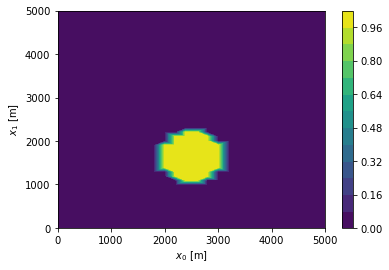

In [29]:
plt.figure()
contour=plt.tricontourf(x_np[0], x_np[1], oz_np[0], 15)
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.colorbar(contour)

Now we can set the right hand side `Y` of the PDE `model`:

In [31]:
G=6.67e-11  # m^3/kg/sec^2 gravity constant

Now we need to talk about boundary conditions:

We want the potential to be zero at the top of the domain, this is $x_1=L1$. This is enforced in form of 
Dirichlet-type boundary condition. 

To tell `LinearSinglePDE` where we want to have the solution to be set to the value `0` 
we need to set a mask `q` which marks the locations on the surface where we want the solution $u$ to be zero:
\begin{equation}\label{EQQ}
q(\mathbf{x}) = \begin{cases}
>0  & \mbox{ set } u(\mathbf{x})=0 \\
=0  & \mbox{ otherwise } 
\end{cases} 
\end{equation}
We use the `whereZero` function which works similar to the `whereNegative` function we used before 
but it returns the value 
`1` at location where the argument has the value `0` Otherwise the value `0` is used:

Worthwhile to have a quick look at `q_top` (a bit difficult to see for finer grids)

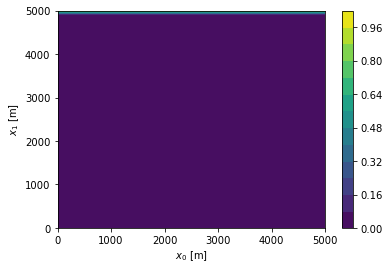

In [34]:
plt.figure()
contour=plt.tricontourf(x_np[0], x_np[1], convertToNumpy(q_top)[0], 15)
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.colorbar(contour)

Hand this `q_top` to the `model` to define the locations of Dirichlet-type boundary conditions.
The value for the solution is assumed to be set to zero by default (which can be changed if required.)

Now we are are ready to get the solution of the PDE:

Let's lake a look at the solution:

In [37]:
u, str(u)

(<esys.escriptcore.escriptcpp.Data at 0x7f4fbeb2e5f0>,
 'Summary: inf=-0.756395 sup=0 data points=1326')

and then plotting:

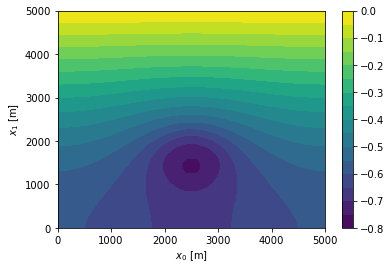

In [38]:
plt.figure()
contour=plt.tricontourf(x_np[0], x_np[1], convertToNumpy(u)[0], 15)
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.colorbar(contour)

**Note**

The `getSolution` call involves the solution of system of linear equation. The dimension 
is the number of FEM nodes. For large grids and for 3D problems this solve can take some time.

*Question*: What boundary conditions are applied on the other three faces?
By default the so called Neumann-type boundary conditions
\begin{equation}\label{eq:weakBC}
\mathbf{F}^T \mathbf{n} = F_0 n_0 + F_1 n_1 = 0
\end{equation}
with outer normal field $\mathbf{n}=(n_0, n_1)$ are assumed.

It is $\mathbf{n}=(-1,0)$ on the left face
\begin{equation}\label{eq:weakBC1}
\mathbf{F}^T \mathbf{n} = - F_0= \frac{\partial u}{\partial x_0} = -g_0 = 0
\end{equation}
On the right face we have $\mathbf{n}=(1,0)$
\begin{equation}\label{eq:weakBC2}
\mathbf{F}^T \mathbf{n} = F_0= -\frac{\partial u}{\partial x_0} =  g_0 = 0
\end{equation}
and on the bottom surface it is $\mathbf{n}=(0,-1)$:
\begin{equation}\label{eq:weakBC3}
\mathbf{F}^T \mathbf{n} = - F_1= \frac{\partial u}{\partial x_1} =  -g_1 = 0
\end{equation}
In summary: normal gravity field component are set to zero if no Dirichlet-type boundary condition is applied.

## Gravity Field

We are interested in the gravity field $\mathbf{g}$ as negative gradient 
of the potential: 
\begin{equation} 
\mathbf{g} = -
\mathbf{\nabla} U 
\end{equation} 
The `grad` function returns the gradient of the argument. The negative of the gradient 
gives us the gravitational acceleration `g`:

The gravity field is a vector:

These are the values:

You will realize that the number data points of `g` is different form the number data points of the solution - for instance. The reason for this that the gradient is calculate not on the FEM nodes but numerical integration points in the element (in case of rectangular element by default four numerical integration points per element are used). `escript` provides an mechanism to retrieve information for a `Data` object such as `u` or `g` 
on where the values are stored. The property is called `FunctionSpace` (sorry for the cumbersome name). 

We can try this for `g`, `u` and `x`:

This a list of  location attributes are available:

- `ContinuousFunction(domain)`: FEM nodes
- `Solution(domain)`: solution of a PDE, typically also on FEM nodes 
- `Function(domain)` : on integration points per element
- `ReducedFunction(domain)`: on element centers
- `DiracDeltaFunction(domain)`: point sources and sinks which we will use later

The `FunctionSpace` attribute allows us to compare if the values of two `Data` objects are stored on the same locations:

or if values of a `Data` objects are stored specific locations:

We can also retrieve the locations of where values in a data object are stored: 

We can plot the locations used for `Solution(domain)` and `ReducedFunction(domain)`. First the values `Data` objects to a `numpy` arrays:

And then we can plot the locations as scatter plot:

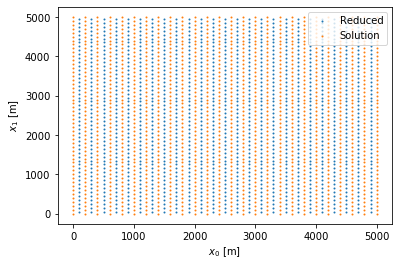

In [53]:
plt.figure()
plt.scatter(X_np[0,:], X_np[1,:], s=1, label="Reduced")
plt.scatter(x_np[0,:], x_np[1,:], s=1, label="Solution")
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.legend()

We can also enforce to use specific locations = `FunctionSpace` for storing values. 
For instance we can evaluate the gradient at the element centers = `ReducedFunction(domain)`:

We can easily plot this gravity field:

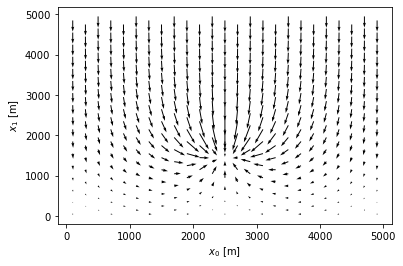

In [56]:
plt.figure()
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.quiver(X_np[0,::3], X_np[1,::3], g_np[0, ::3], g_np[1,::3])

**Note**:
For larger meshes with millions of element and also for 3D domains `matplotlib` is not really suitbale. 
Firstly its is just too slow but it also does not provide appropriate functionalities to deal with these kind of data. Alternative packages are 
- [mayavi](https://docs.enthought.com/mayavi/mayavi/)
- [paraview](https://www.paraview.org/)
- [visit](https://wci.llnl.gov/simulation/computer-codes/visit/)

Although these packages can also be used from python it is more appropriate to use them separately trough their respective GUIs. To hand data to them `Data` objects are written to external files preferable in the `VTK` format. 
This can be done using the `saveVTK` function from the `esys.weipa` module, see the users guide for details.

## Value Picking

Visualization of the distribution is often not sufficient for instance if one wants to apply a more quantitative 
analysis of the result; for instance comparison with a observations. There is a mechanism to pick values of `Data` objects at specific locations. 

##### Single Value
Here we want to obtain the vertical gravity at a point at a height $h=500$ m above the center of the circular anomaly located at $c$. The location of this point $\mathbf{p}$ is then
\begin{equation}\label{eq:P}
\mathbf{p}=(c_0, c_1+300)
\end{equation}
We define a so-called `Locator` that provides a mechanism to extract the value at this point $\mathbf{p}$.

In [57]:
from esys.escript.pdetools import Locator
p=[c[0], c[1]+300]

The `Locator` is build for the use at all `Data` objects with a specific `FunctionSpace` attribute; in our case
that should be the same as for `gz` = `g[1]`:

Now we can easily get the value of `gz` at `p`:

Better to express this in mGal:

In [61]:
mGal=100000

The `Locator` actually is not always using the specified point but picks the location 
of the `FunctionSpace.getX()` nearest to the requested location. We can check `p` and the 
location actually being used using the `getX` method:

The `point_locator` can be reused to pick values from other `Data` objects as long as they can interpolated
to `ReducedFunction`:

### Along a line of points (transect)
One can also use the `Locator` to pick data for a set of points for instance along a horizontal transect.
First we define the $x_0$-coordinates of the points we would like to use to be aligned with element centers:

We then add the $x_1$ coordinate as $0.75 \cdot L1 $ to define the locations in the transect in the 2D domain:

In [67]:
H_transect=L1*0.75

Now we can create new `Locator` named `transect_locator` using the points `x_transect`:

Then the vertical gravity across the transect can be picked from `gz`. 

We also get the true $x_0$ coordinates 
of the points in the transect:

And finally we can plot the vertical gravity over the transect:

Text(0.5, 1.0, 'gravity anomaly over transect @ height 3750 m')

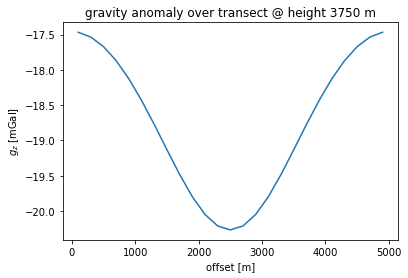

In [73]:
plt.figure()
plt.plot(x0_transect, gz_transect)
plt.xlabel('offset [m]')
plt.ylabel('$g_z$ [mGal]')
plt.title("gravity anomaly over transect @ height %g m"%(transect_locator.getX()[0][1]))
